In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

#getting available filenames
lms = ["xlmRBase", "xlmRLarge", "mBertUncased", "mBertCased", "nbBertBase", "nbBertLarge", "norbert", "norbert2"]
tags = ["i100_r0","i100_r1","i100_r2","i200_r0","i200_r1","i200_r2","i300_r0","i300_r1","i300_r2"]
allFiles = []

for lm in lms:
    for tag in tags:
        allFiles.append(f"{lm}_{tag}")

In [3]:
def formatMetadata(dataFile):
    with open(f"output_data/metadataTotalRuntime/{dataFile}.csv", mode = "r",encoding="UTF-8") as file:
        csvFile = csv.reader(file, delimiter=";")
        next(csvFile)
        metadata = [x for x in csvFile] # excluding total runtime

    hypLen = [int(x[1]) for x in metadata]
    sampleNr = [int(x[2]) for x in metadata]
    sampleRunTime = [float(x[3]) for x in metadata]
    totalRunTime = [float(x[4]) for x in metadata]
    return (hypLen, sampleNr, sampleRunTime, totalRunTime)

data0 = list(map(lambda x: formatMetadata(f"{x}_i300_r0"), lms))
data1 = list(map(lambda x: formatMetadata(f"{x}_i300_r1"), lms))
data2 = list(map(lambda x: formatMetadata(f"{x}_i300_r2"), lms))

In [4]:
def avgColumn(column):
    x = [x[column] for x in data0]
    y = [x[column] for x in data1]
    z = [x[column] for x in data2]
    avg = []

    for i in range(len(x)):
        ls = []
        for j in range(len(x[0])):
            ls.append(int((x[i][j] + y[i][j] + z[i][j])/3))
        avg.append(ls)

    return avg

hypLengths = avgColumn(0)
sampleNRS = avgColumn(1)
sampleRt = avgColumn(2)
totalRt = avgColumn(3)
x300 = np.arange(301)[1:]

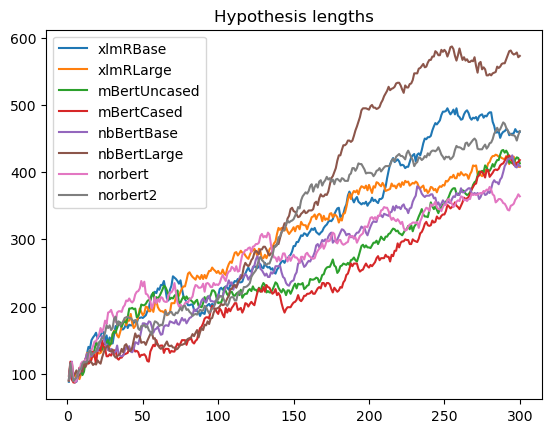

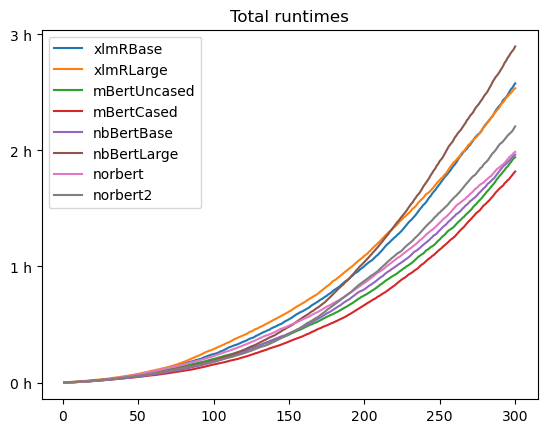

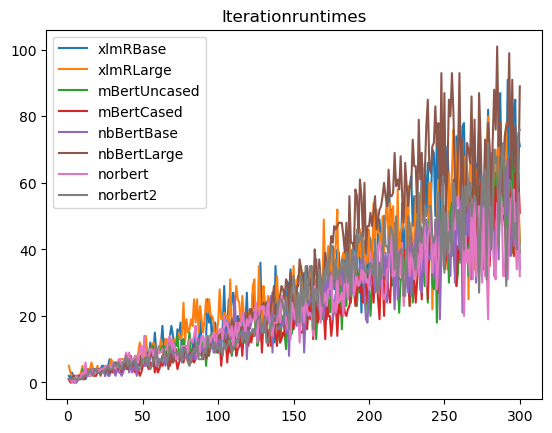

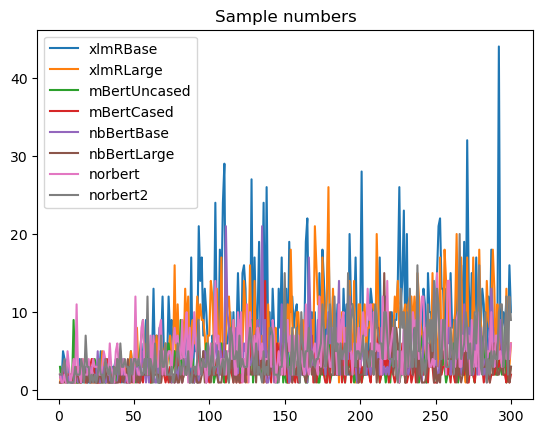

In [9]:
def comapreV0(lms, xdata, ydata,title,t=False):
    if t:
        ticks = [0, 3600, 7200, 10800]
        plt.yticks(ticks, [f"{i} h" for i in range(len(ticks))])
    for y in ydata:
        plt.plot(xdata, y)
    plt.legend(lms)
    plt.title(title)
    plt.show()
comapreV0(lms, x300, hypLengths, "Hypothesis lengths")
comapreV0(lms, x300, totalRt, "Total runtimes", True)
comapreV0(lms, x300, sampleRt, "Iterationruntimes")
comapreV0(lms, x300, sampleNRS, "Sample numbers")

In [31]:
# V1
lms_ = ["xlmRB", "xlmRL", "mBU", "mBC", "nbBB", "nbBL", "norb", "norb2"]
# pos  = [[0,0],[1,0],[2,0],[3,0],[0,1],[1,1],[2,1],[3,1]]
pos  = [[0,0],[0,1],[1,0],[1,1],[2,0],[2,1],[3,0],[3,1]]
# pos  = [[0,0],[0,1],[0,2],[0,3],[1,1],[1,1],[1,1],[1,1]]
def compareV1(xdata, ydata, lmtag, pos, ycap):
    for i in range(len(pos)):
        xpos, ypos = pos[i]
        axis[xpos,ypos].plot(xdata, ydata[i])
        axis[xpos,ypos].set_ylim((0,ycap))
        axis[xpos,ypos].set_title(lmtag[i], x=0.1, y=0.75)
    plt.show()

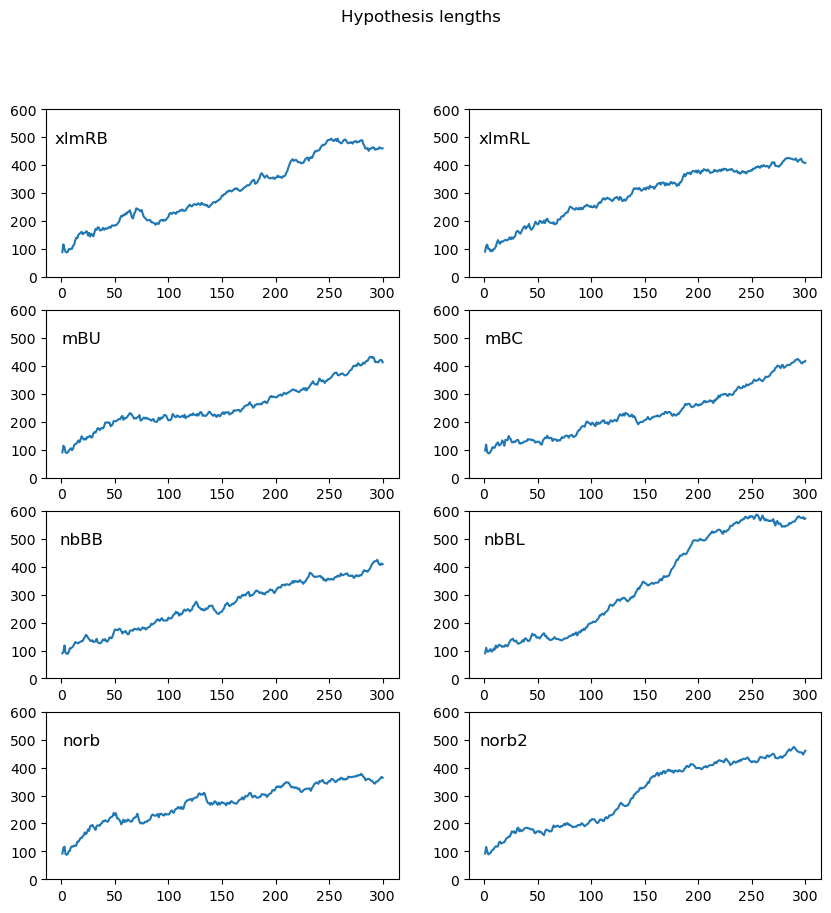

In [32]:
figure, axis = plt.subplots(4, 2, figsize=(10, 10))
figure.suptitle("Hypothesis lengths")
compareV1(x300, hypLengths, lms_, pos, 600)

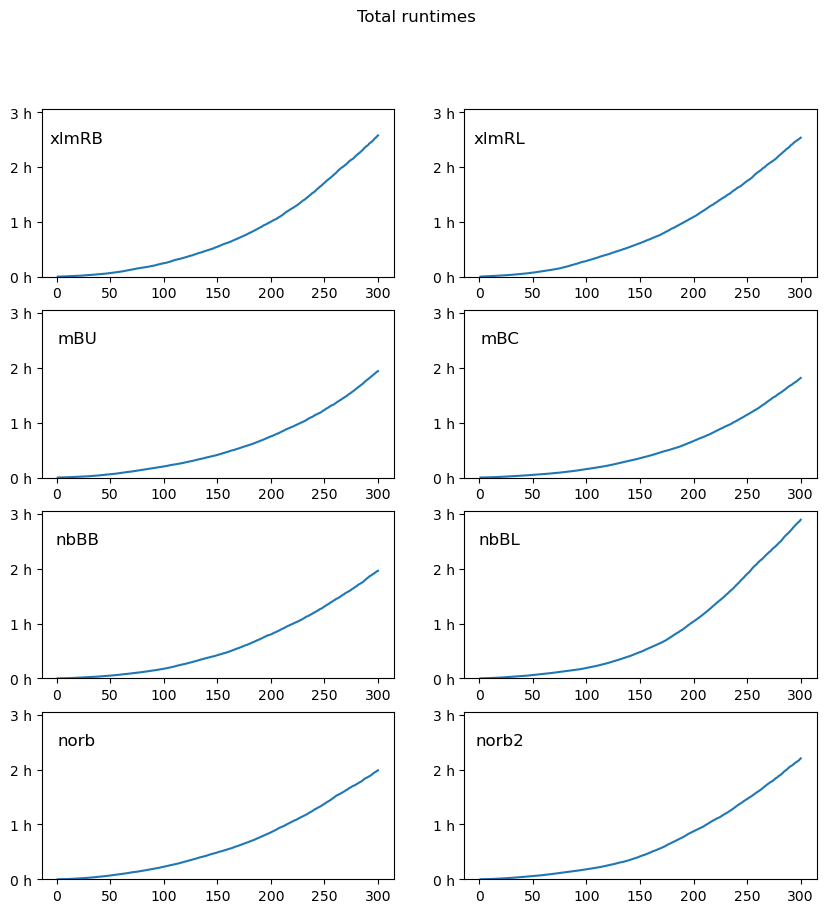

In [33]:
figure, axis = plt.subplots(4, 2, figsize=(10, 10))
figure.suptitle("Total runtimes")

ticks = [0, 3600, 7200, 10800]
for ax_row in axis:          # each row is a 1-D array
    for ax in ax_row:        # each element is a single Axes
        ax.set_yticks(ticks)
        ax.set_yticklabels([f"{i} h" for i in range(len(ticks))])

compareV1(x300, totalRt, lms_, pos, 11000)

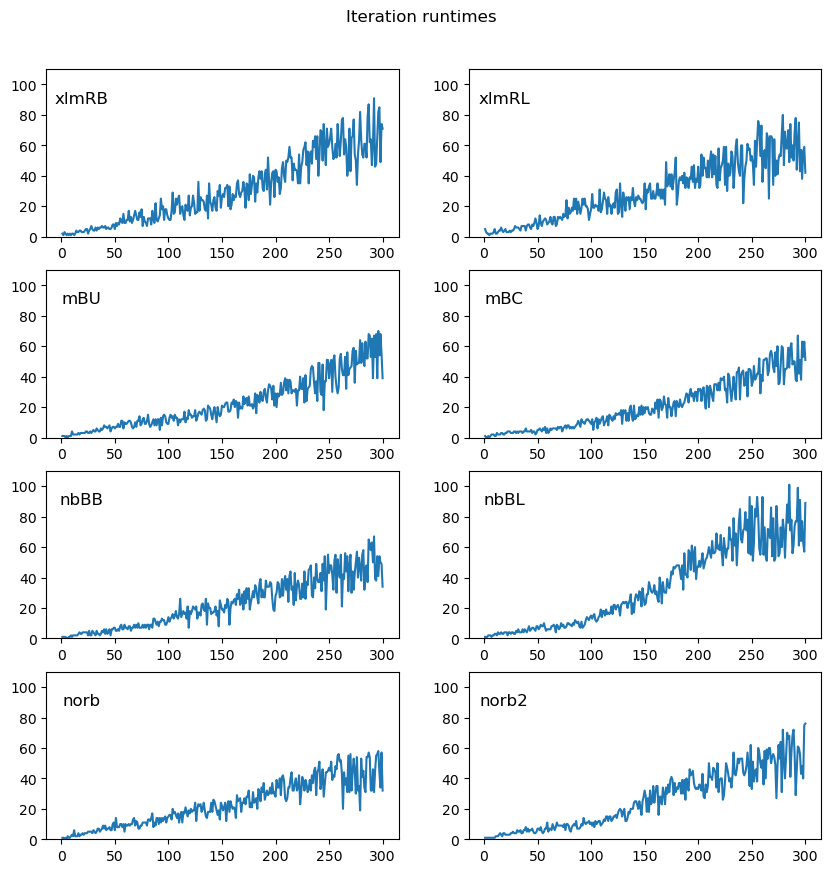

In [34]:
figure, axis = plt.subplots(4, 2, figsize=(10, 10))
figure.suptitle("Iteration runtimes", x=0.5, y=0.94)
compareV1(x300, sampleRt, lms_, pos, 110)

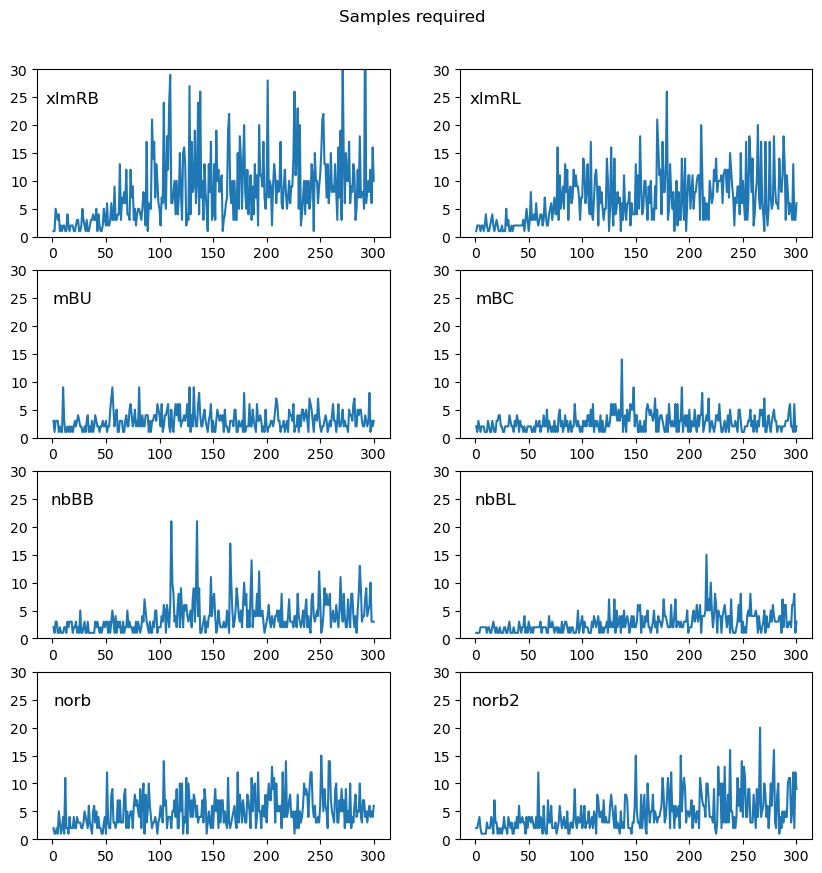

In [35]:
figure, axis = plt.subplots(4, 2, figsize=(10, 10))
figure.suptitle("Samples required", x=0.5, y=0.94)
compareV1(x300, sampleNRS, lms_, pos, 30)